In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [2]:
def plotting_function(xs, ys, popt, pcov, xlabel='', ylabel='', plot_shape='kD', round_to=4):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k')

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)

In [3]:
def straight_line(x, m, c): return m*x + c

In [4]:
Cref = .22e-6
d = 2e-3
A = np.pi*np.power(0.13, 2)
epsilon_o = 8.854187817e-12

# Air

## Method 1

If the Equation is y = mx + c
For the best fit curve:
    m = 2.426e-07 ± 7.837e-09
    c = 1.748e-08 ± 1.979e-08

The curve looks like:


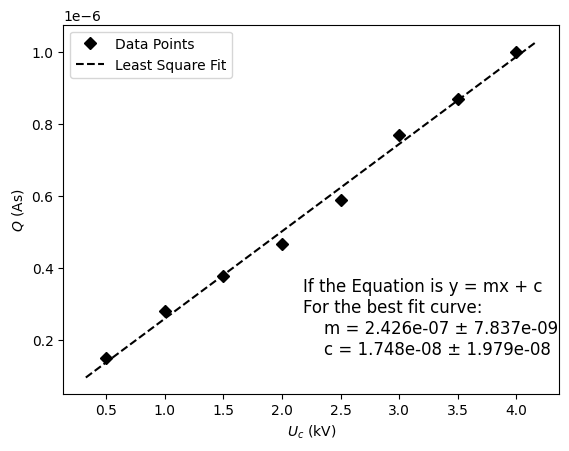

In [5]:
uc = np.arange(0.5, 4.1, 0.5)
vo_1 = np.array([0.68, 1.26, 1.65, 2.00, 2.75, 3.50, 4.0, 4.6])
vo_2 = np.array([0.68, 1.3 , 1.80, 2.25, 2.60, 3.50, 3.9, 4.5])
q = Cref*np.mean([vo_1, vo_2], axis=0)

method_1 = curve_fit(straight_line, uc, q)
plotting_function(uc, q, method_1[0], method_1[1], '$U_c$ (kV)', '$Q$ (As)')

In [6]:
e_air_1 = (d*method_1[0][0]*0.001)/(epsilon_o*A)
e_air_1

1.03214270401229

In [8]:
table_1 = np.array([uc, np.mean([vo_1, vo_2], axis=0), q*10e8]).transpose()
print(tabulate(table_1, tablefmt="latex"))

\begin{tabular}{rrr}
\hline
 0.5 & 0.68  &  149.6 \\
 1   & 1.28  &  281.6 \\
 1.5 & 1.725 &  379.5 \\
 2   & 2.125 &  467.5 \\
 2.5 & 2.675 &  588.5 \\
 3   & 3.5   &  770   \\
 3.5 & 3.95  &  869   \\
 4   & 4.55  & 1001   \\
\hline
\end{tabular}


## Method 2

If the Equation is y = mx + c
For the best fit curve:
    m = 8.33e-07 ± 1.516e-08
    c = 9.147e-09 ± 8.324e-09

The curve looks like:


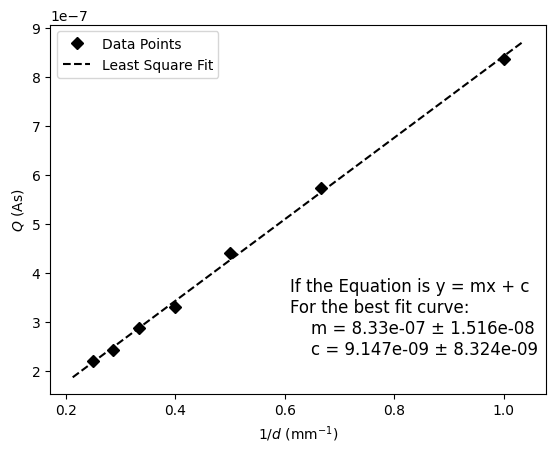

In [10]:
ds_inv = 1/np.arange(1, 4.1, 0.5)
vo_ = np.array([3.8, 2.6, 2, 1.5, 1.3, 1.1, 1.])
q_ = Cref*vo_

method_2 = curve_fit(straight_line, ds_inv, q_)
plotting_function(ds_inv, q_, method_2[0], method_2[1], '$1/d$ (mm$^{-1}$)', '$Q$ (As)')

In [11]:
uc_2 = 1500
e_air_2 = (method_2[0][0]*0.001)/(epsilon_o*A*uc_2)
e_air_2

1.181330628388025

In [12]:
table_2 = np.array([np.arange(1, 4.1, 0.5), vo_, q_*10e8]).transpose()
print(tabulate(table_2, tablefmt="latex"))

\begin{tabular}{rrr}
\hline
 1   & 3.8 & 836 \\
 1.5 & 2.6 & 572 \\
 2   & 2   & 440 \\
 2.5 & 1.5 & 330 \\
 3   & 1.3 & 286 \\
 3.5 & 1.1 & 242 \\
 4   & 1   & 220 \\
\hline
\end{tabular}


In [13]:
e_air = (e_air_1+e_air_2)/2
e_air

1.1067366662001574

## Error analysis

In [14]:
del_slope_1, del_slope_2 = method_1[1][0][0]**0.5, method_2[1][0][0]**0.5

# e1 = d*slope
del_e_1 = e_air_1*np.sqrt((0.1/2)**2 + (del_slope_1/method_1[0][0])**2)

# e2 = slope/uc
del_e_2 = e_air_2*np.sqrt((100/uc_2)**2 + (del_slope_2/method_2[0][0])**2)

del_e = 0.5*np.sqrt((del_e_1)**2 + (del_e_2)**2)
del_e_1, del_e_2, del_e

(0.06144074440360065, 0.08163829486275655, 0.05108761166116245)

# Wood

If the Equation is y = mx + c
For the best fit curve:
    m = 2.057e-07 ± 7.811e-09
    c = 2.284e-07 ± 1.972e-08

The curve looks like:


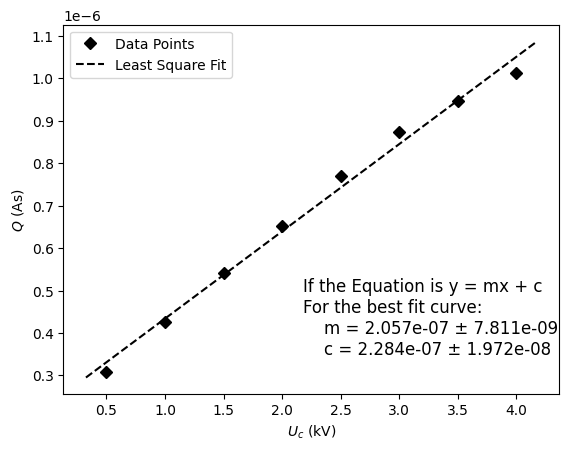

In [ ]:
vo_wood_1 = np.array([1.6, 1.9, 2.3, 2.8, 3.4, 3.9, 4.1, 4.2])
vo_wood_2 = np.array([1.0, 1.8, 2.5, 3.0, 3.6, 4.0, 4.3, 4.8])
vo_wood_3 = np.array([1.6, 2.1, 2.6, 3.1, 3.5, 4.0, 4.5, 4.8])
vo_wood = np.mean([vo_wood_1, vo_wood_2, vo_wood_3], axis=0)
q_wood = Cref*vo_wood

curve_wood = curve_fit(straight_line, uc, q_wood)
plotting_function(uc, q_wood, curve_wood[0], curve_wood[1], '$U_c$ (kV)', '$Q$ (As)')

In [ ]:
d_wood = 0.0082
e_wood = (d_wood*curve_wood[0][0]*0.001)/(epsilon_o*A)

e_wood

3.587781370795464

In [ ]:
del_e_wood = e_wood*np.sqrt((0.0001/d_wood)**2 + (curve_wood[1][0][0]/curve_wood[0][0])**2)
del_e_wood

0.04375343135116421

In [ ]:
table_3 = np.array([uc, vo_wood, q_wood*10e8]).transpose()
print(tabulate(table_3, tablefmt="latex"))

\begin{tabular}{rrr}
\hline
 0.5 & 1.4     &  308     \\
 1   & 1.93333 &  425.333 \\
 1.5 & 2.46667 &  542.667 \\
 2   & 2.96667 &  652.667 \\
 2.5 & 3.5     &  770     \\
 3   & 3.96667 &  872.667 \\
 3.5 & 4.3     &  946     \\
 4   & 4.6     & 1012     \\
\hline
\end{tabular}


# Styrofoam

If the Equation is y = mx + c
For the best fit curve:
    m = 5.348e-08 ± 6.521e-10
    c = 2.776e-09 ± 1.647e-09

The curve looks like:


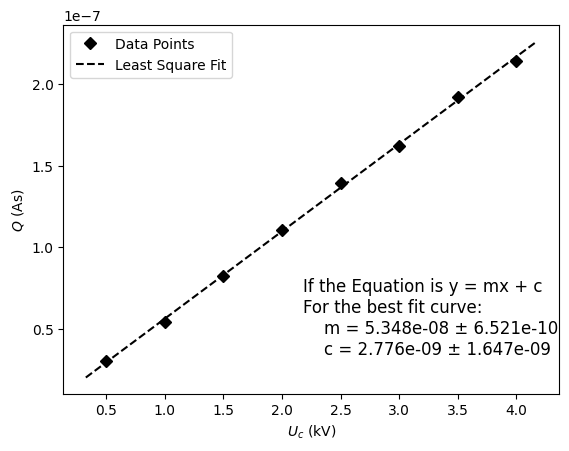

In [ ]:
vo_sty_1 = np.array([1.1, 2.4, 3.9, 5.1, 6.3, 7.5, 9, 10])*0.1
vo_sty_2 = np.array([14, 25, 38, 48, 63, 72, 86, 98])*0.01
vo_sty_3 = np.array([16, 25, 35, 52, 64, 74, 86, 94])*0.01
vo_sty = np.mean([vo_sty_1, vo_sty_2, vo_sty_3], axis=0)
q_sty = Cref*vo_sty

curve_sty = curve_fit(straight_line, uc, q_sty)
plotting_function(uc, q_sty, curve_sty[0], curve_sty[1], '$U_c$ (kV)', '$Q$ (As)')

In [ ]:
d_sty = 0.0192
e_sty = (d_sty*curve_sty[0][0]*0.001)/(epsilon_o*A)

e_sty

2.1843139256097444

In [ ]:
del_e_sty = e_sty*np.sqrt((0.0001/d_sty)**2 + (curve_sty[1][0][0]/curve_sty[0][0])**2)
del_e_sty

0.01137663502921742

In [ ]:
table_4 = np.array([uc, vo_sty, q_sty*10e8]).transpose()
print(tabulate(table_4, tablefmt="latex"))

\begin{tabular}{rrr}
\hline
 0.5 & 0.136667 &  30.0667 \\
 1   & 0.246667 &  54.2667 \\
 1.5 & 0.373333 &  82.1333 \\
 2   & 0.503333 & 110.733  \\
 2.5 & 0.633333 & 139.333  \\
 3   & 0.736667 & 162.067  \\
 3.5 & 0.873333 & 192.133  \\
 4   & 0.973333 & 214.133  \\
\hline
\end{tabular}
